In [1]:
#see cifar10_trainer.py for training parameters
from cifar10_trainer import train_cifar10, files_in_subdirs, reduce_to, get_cat
cifar10_train = files_in_subdirs('./cifar10/train')
cifar10_val = files_in_subdirs('./cifar10/test')
cifar10_paths = cifar10_val+cifar10_train
print("Loaded: ",len(cifar10_train), len(cifar10_val))

Loaded:  50000 10000


In [2]:
#check correct reduction of labels:
from collections import Counter
print("Maximum: ",Counter([get_cat(p) for p in reduce_to(cifar10_paths,7000)][10000:]))
print("123: ",Counter([get_cat(p) for p in reduce_to(cifar10_paths,123)][10000:]))
print("123: ",Counter([get_cat(p) for p in reduce_to(cifar10_paths,123,{'dog':1000})][10000:]))

Maximum:  Counter({'truck': 5000, 'bird': 5000, 'cat': 5000, 'automobile': 5000, 'airplane': 5000, 'horse': 5000, 'dog': 5000, 'frog': 5000, 'ship': 5000, 'deer': 5000})
123:  Counter({'truck': 123, 'bird': 123, 'cat': 123, 'automobile': 123, 'airplane': 123, 'horse': 123, 'dog': 123, 'frog': 123, 'ship': 123, 'deer': 123})
123:  Counter({'dog': 1000, 'truck': 123, 'bird': 123, 'cat': 123, 'automobile': 123, 'airplane': 123, 'horse': 123, 'frog': 123, 'ship': 123, 'deer': 123})


In [4]:
from tqdm.notebook import tqdm
import numpy as np
#testing with 3 epochs
test_num = [4500, 4000, 3500, 3000, 2500, 2000, 1500, 1000, 750, 500, 250, 100, 50, 10]
min_acc = []
mean_acc = []
for max_num in tqdm(test_num):
    reduced_subset = reduce_to(cifar10_paths,max_num)
    tta_acc_example3 = [train_cifar10(reduced_subset, verbose=False, epochs_per_pass=3) for _ in range(1)]
    min_acc.append(np.min(list(tta_acc_example3[0].values())))
    mean_acc.append(np.mean(list(tta_acc_example3[0].values())))
    print("Result 3+3 epochs with %i samples per class:"%max_num, tta_acc_example3[0])

Result 3+3 epochs with 4500 samples per class: {'truck': 0.957, 'bird': 0.95, 'cat': 0.898, 'automobile': 0.97, 'airplane': 0.962, 'horse': 0.967, 'dog': 0.899, 'frog': 0.975, 'ship': 0.973, 'deer': 0.968}
Result 3+3 epochs with 4000 samples per class: {'truck': 0.963, 'bird': 0.944, 'cat': 0.882, 'automobile': 0.972, 'airplane': 0.968, 'horse': 0.969, 'dog': 0.896, 'frog': 0.975, 'ship': 0.974, 'deer': 0.962}
Result 3+3 epochs with 3500 samples per class: {'truck': 0.962, 'bird': 0.934, 'cat': 0.876, 'automobile': 0.975, 'airplane': 0.969, 'horse': 0.966, 'dog': 0.89, 'frog': 0.975, 'ship': 0.972, 'deer': 0.963}
Result 3+3 epochs with 3000 samples per class: {'truck': 0.964, 'bird': 0.94, 'cat': 0.867, 'automobile': 0.962, 'airplane': 0.962, 'horse': 0.964, 'dog': 0.883, 'frog': 0.966, 'ship': 0.975, 'deer': 0.958}
Result 3+3 epochs with 2500 samples per class: {'truck': 0.952, 'bird': 0.928, 'cat': 0.836, 'automobile': 0.966, 'airplane': 0.942, 'horse': 0.961, 'dog': 0.903, 'frog': 0

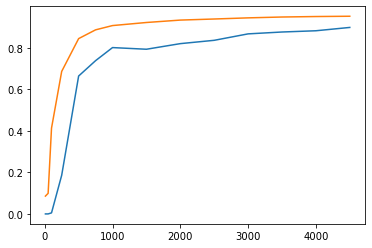

In [5]:
import matplotlib.pyplot as plt
plt.plot(test_num, min_acc, label = "min_acc")
plt.plot(test_num, mean_acc, label = "mean_acc")